#  AULA 4 : Estatística e Correlações do ENEM


## Analise Preditiva da Base com dados do ENEM.

Importando Bibliotecas

In [0]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
url = "https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dados = pd.read_csv(url)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,1,2207702.0,Parnaíba,22.0,PI,1,5,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,1,3557105.0,Votuporanga,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,160.0,120.0,120.0,160.0,120.0,680.0,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,1,2506301.0,Guarabira,25.0,PB,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,120.0,600.0,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,1,3514403.0,Dracena,35.0,SP,2,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,100.0,120.0,100.0,80.0,0.0,400.0,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,1,3550308.0,São Paulo,35.0,SP,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [0]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [0]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.378440e+05,137844.0,1.378440e+05,137844.000000,137843.000000,132485.000000,137844.000000,137844.000000,1.331400e+05,133140.000000,137844.000000,137844.000000,137844.000000,86900.000000,137844.000000,3.623200e+04,3.623200e+04,36232.000000,36232.000000,36232.000000,36232.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.0,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,...,137844.000000,137844.0,137844.0,137844.0,137844.0,137844.000000,137844.000000,137844.000000,137844.000000,137844.0,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,1.378440e+05,137844.000000,137838.000000,137838.000000,137838.000000,137838.000000,97537.000000,103774.000000,103774.000000,97537.000000,97537.000000,103774.000000,103774.000000,97537.000000,137844.000000,103774.000000,103774.000000,103774.000000,103774.000000,103774.000000,103774.000000,103774.000000,137844.000000
mean,1.800104e+11,2018.0,3.118377e+06,31.030701,22.378967,0.120655,2.123204,1.039001,3.085665e+06,30.701893,1.540568,3.000559,1.344302,1.200587,0.096116,3.158708e+07,3.160970e+06,31.452528,2.310030,1.034776,1.006127,0.000856,0.000102,0.000326,0.000443,0.0,0.001669,0.000305,0.001066,0.000203,0.000036,0.000181,0.000305,0.000783,0.000370,0.000987,0.000015,0.000015,0.001973,0.000058,...,0.000015,0.0,0.0,0.0,0.0,0.000109,0.000007,0.000007,0.000007,0.0,0.000058,0.000051,0.000022,0.000015,0.000015,0.000007,0.000058,3.119913e+06,31.047184,0.708012,0.753392,0.753392,0.708012,448.510155,452.515707,456.513462,460.504967,493.633406,568.309626,526.591341,535.178874,0.533313,1.103783,121.728564,101.695608,97.181953,117.028157,71.499027,509.133116,3.895447
std,1.918950e+06,0.0,9.944830e+05,9.916221,7.610313,0.376805,1.017945,0.231610,9.756807e+05,9.723525,0.722004,4.000202,0.701637,0.596257,0.294751,9.765074e+06,9.798715e+05,9.770447,0.779885,0.183214,0.118252,0.029246,0.010077,0.018065,0.021032,0.0,0.040814,0.017453,0.032639,0.014251,0.006023,0.013466,0.017453,0.027980,0.019231,0.031395,0.003809,0.003809,0.044378,0.007618,...,0.003809,0.0,0.0,0.0,0.0,0.010431,0.002693,0.002693,0.002693,0.0,0.007618,0.007126,0.004665,0.003809,0.003809,0.002693,0.007618,9.948001e+05,9.919332,0.455109,0.431644,0.431644,0.455109,1.213054,1.329739,1.309970,1.143691,74.183094,81.026551,73.024234,102.827600,0.498891,0.688518,31.323537,49.506448,47.001285,35.202051,52.205925,187.014052,1.505254
min,1.800072e+11,2018.0,1.100015e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100015e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100006e+07,1.100015e+06,11.000000,1.000000,1.000000,1.00

Observa-se que o método describe, retorna apenas informações de dados numéricos.

Coletando apenas os dados das notas.

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.1,671.3,661.6,738.0,680.0
2,409.2,531.7,389.0,438.1,600.0
3,452.3,505.5,448.5,544.9,400.0
6,428.5,505.2,521.0,436.8,560.0
8,491.8,575.7,524.4,487.6,660.0


In [0]:
len(dados_notas)

97270

In [0]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.000000,0.571979,0.600252,0.579052,0.513206
ciencias_humanas,0.571979,1.000000,0.698270,0.529275,0.502914
linguagem_codigo,0.600252,0.698270,1.000000,0.565544,0.562957
matematica,0.579052,0.529275,0.565544,1.000000,0.483313
redacao,0.513206,0.502914,0.562957,0.483313,1.000000


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre linguagem_codigo e ciencias_humanas, o que parece fazer sentido. Uma correlação que surpreende é entre linguagem_codigo e redacao

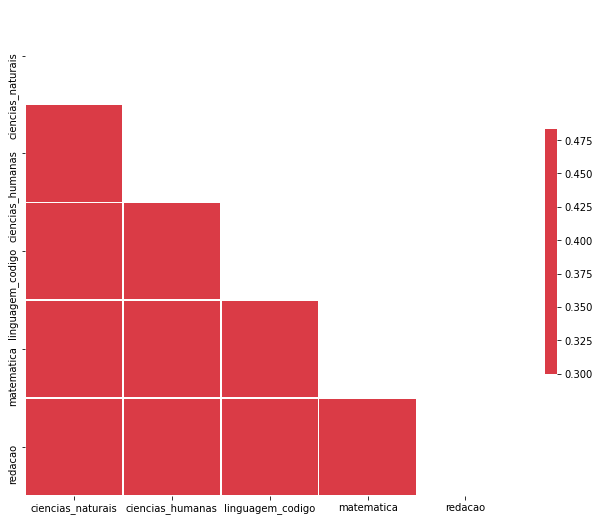

In [0]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Não é possível tirar nenhuma conclusão com isso, mas não se preocupe um dos desafios dessa aula é solucionar esse problema e replotar esse grafico de uma forma mais clara.

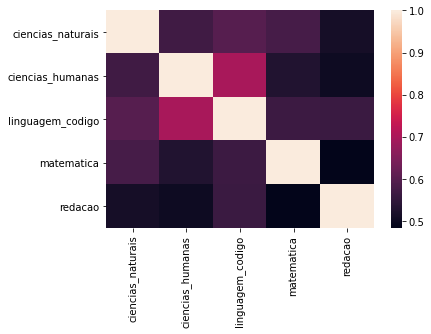

In [0]:
sns.heatmap(corr)

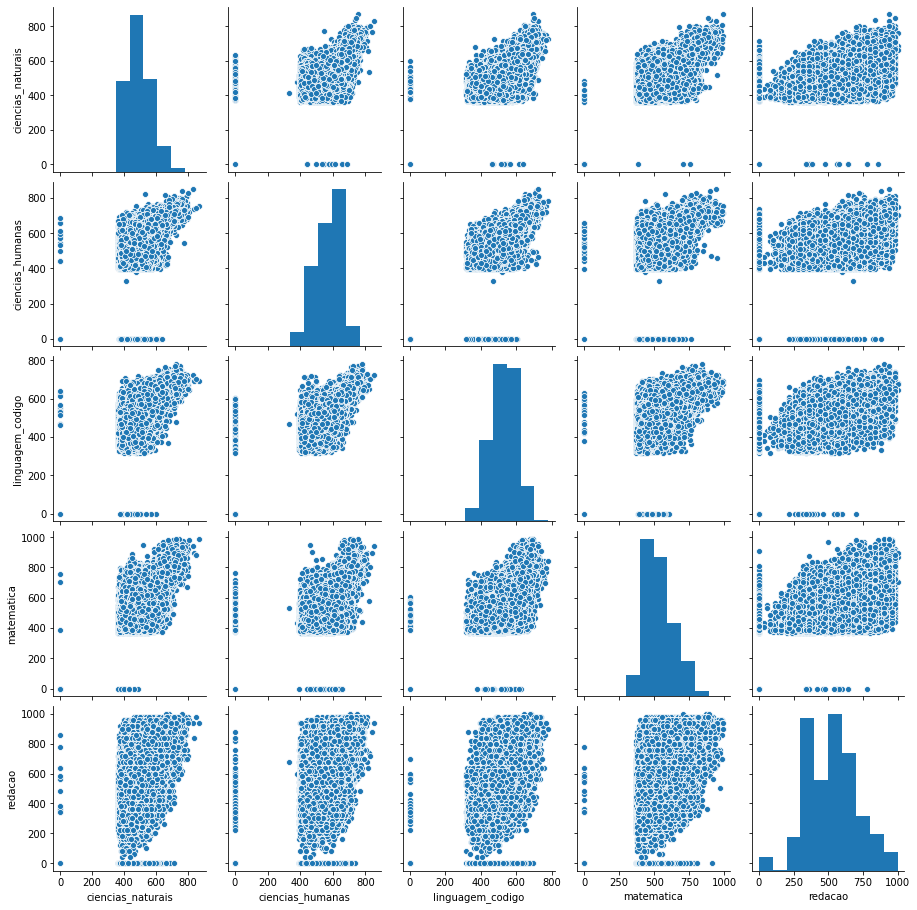

In [0]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível.

## Desafios aula 4

### Desafio 1

*   Se a pessoa não teve presença, preencha a nota dela com 0.




In [0]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,1,2207702.0,Parnaíba,22.0,PI,1,5,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,1,3557105.0,Votuporanga,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,160.0,120.0,120.0,160.0,120.0,680.0,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,1,2506301.0,Guarabira,25.0,PB,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,120.0,600.0,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,1,3514403.0,Dracena,35.0,SP,2,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,100.0,120.0,100.0,80.0,0.0,400.0,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,1,3550308.0,São Paulo,35.0,SP,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [0]:
faltou = 0
presente = 1
eliminado = 2

In [0]:
dados_desafio1 = dados.copy()

In [0]:
dados_desafio1[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_MT','TP_PRESENCA_LC','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,523.1,671.3,661.6,738.0
2,1.0,1.0,1.0,1.0,409.2,531.7,389.0,438.1
3,1.0,1.0,1.0,1.0,452.3,505.5,448.5,544.9
4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
137839,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
137840,1.0,1.0,1.0,1.0,382.4,534.2,468.1,576.4
137841,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
137842,1.0,1.0,1.0,1.0,452.7,509.3,527.7,591.4


In [0]:
for tipo in ["CN", "CH", "MT", "LC"]:
  dados_desafio1.loc[dados['TP_PRESENCA_'+ tipo].isin([faltou, eliminado]), 'NU_NOTA_'+tipo] = 0

In [0]:
dados_desafio1[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_MT','TP_PRESENCA_LC','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,523.1,671.3,661.6,738.0
2,1.0,1.0,1.0,1.0,409.2,531.7,389.0,438.1
3,1.0,1.0,1.0,1.0,452.3,505.5,448.5,544.9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
137839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137840,1.0,1.0,1.0,1.0,382.4,534.2,468.1,576.4
137841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137842,1.0,1.0,1.0,1.0,452.7,509.3,527.7,591.4


### Desafio 2

* A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas

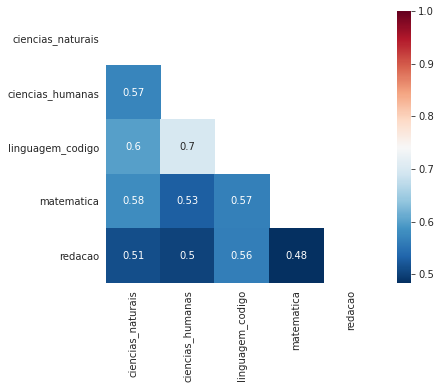

In [0]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, cmap="RdBu_r",annot=True)

### Desafio 3

* Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação).Usar o gabarito e as respostas

In [0]:
dados.dropna(subset=['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT','NU_NOTA_REDACAO'], inplace=True)

In [0]:
dados_respostas_gabarito = dados.loc[:,['NU_INSCRICAO','TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','NU_NOTA_REDACAO']]

Testando com os 5 primeiros alunos

In [0]:
dados_test = dados_respostas_gabarito[1:5]
dados_test = dados_test.set_index('NU_INSCRICAO')
dados_test

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,,,,,
180008223824,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,600.0
180007859645,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,400.0
180009943059,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,560.0
180008290373,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,660.0


Criando funções para percorrer o vetor e comparar

In [0]:
def compara_sequencia(a: str, b: str) -> int:
  acertos = 0
  for i in range(len(a)):
    acertos += a[i] == b[i]
  return acertos

In [0]:
def processa_linha(linha):
  corretas = {'nota_redacao': linha["NU_NOTA_REDACAO"]}

  for tipo in ["CN", "CH", "MT", "LC"]:
    corretas["acertos_" + tipo] = compara_sequencia(linha["TX_RESPOSTAS_"+tipo], linha["TX_GABARITO_"+tipo])

  return pd.Series(corretas)

In [0]:
com_resposta_acertos_teste = dados_test.apply(processa_linha, axis=1)
com_resposta_acertos_teste

,nota_redacao,acertos_CN,acertos_CH,acertos_MT,acertos_LC
NU_INSCRICAO,,,,,
180008223824,600.0,8.0,9.0,6.0,8.0
180007859645,400.0,7.0,10.0,10.0,11.0
180009943059,560.0,11.0,9.0,8.0,15.0
180008290373,660.0,8.0,12.0,13.0,15.0


É possivel observar que com os dados teste deu tudo certo, agora vamos realizar o mesmo procedimento com os dataset original, e em seguida fazer a correlação das notas.

In [0]:
com_resposta_acertos = dados_respostas_gabarito.apply(processa_linha, axis=1)
com_resposta_acertos

,nota_redacao,acertos_CN,acertos_CH,acertos_MT,acertos_LC
1,680.0,11.0,27.0,22.0,33.0
2,600.0,8.0,9.0,6.0,8.0
3,400.0,7.0,10.0,10.0,11.0
6,560.0,11.0,9.0,8.0,15.0
8,660.0,8.0,12.0,13.0,15.0
...,...,...,...,...,...
137835,520.0,12.0,15.0,12.0,15.0
137836,580.0,6.0,12.0,11.0,14.0
137838,820.0,14.0,17.0,9.0,16.0
137840,380.0,7.0,11.0,13.0,13.0


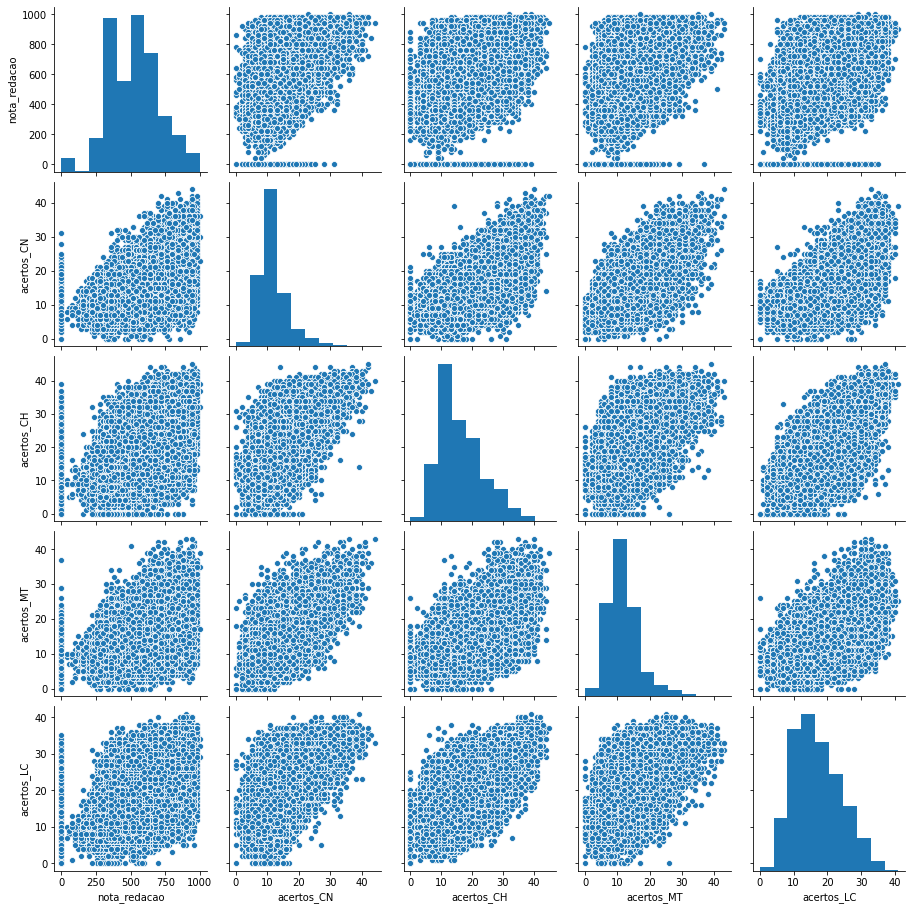

In [0]:
sns.pairplot(data=com_resposta_acertos)
plt.show()

### Desafio 4

* Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
dados_desafio1.to_csv('dados_notas_zeradas_desafio1.csv')

In [0]:
dados_desafio1.isnull().values.any()

True

In [0]:
dados_desafio4 = dados_desafio1.copy()

In [0]:
for tipo in ["CN", "CH", "MT", "LC"]:
  dados_desafio4['NU_NOTA_'+tipo] = dados_desafio1['NU_NOTA_'+tipo].replace(to_replace=0.,value=np.NAN)

In [0]:
dados_desafio4[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,NaN,NaN,NaN,NaN
1,523.1,671.3,661.6,738.0
2,409.2,531.7,389.0,438.1
3,452.3,505.5,448.5,544.9
4,NaN,NaN,NaN,NaN


In [0]:
dados_desafio4.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

In [0]:
dados_desafio4[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
1,523.1,671.3,661.6,738.0
2,409.2,531.7,389.0,438.1
3,452.3,505.5,448.5,544.9
6,428.5,505.2,521.0,436.8
8,491.8,575.7,524.4,487.6


Conferindo se a remoção foi concluida

In [0]:
dados_desafio4.isnull().any()

NU_INSCRICAO               False
NU_ANO                     False
CO_MUNICIPIO_RESIDENCIA    False
NO_MUNICIPIO_RESIDENCIA    False
CO_UF_RESIDENCIA           False
                           ...  
Q023                       False
Q024                       False
Q025                       False
Q026                       False
Q027                       False
Length: 137, dtype: bool

### Desafio 5

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
def corrige_questoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

In [0]:
# Analisando a prova azul de Ciências da Natureza
prova_cn_azul = dados.query('CO_PROVA_CN == 447')

matriz_acertos = prova_cn_azul.apply(corrige_questoes, materia='CN', axis=1)
matriz_acertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


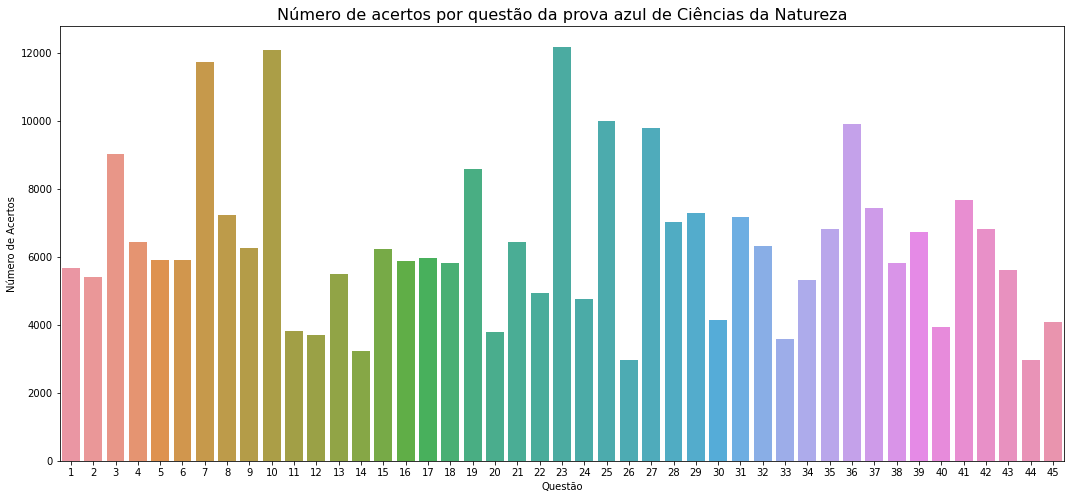

In [0]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
total_acertos_por_questao.reset_index(inplace=True)
total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza', fontsize=16)

plt.show()

### Desafio 6

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

# AULA 5: Regressão linear e Machine Learning

## Continuação da análise preditiva da base de dados do Enem

Vamos criar um modelo de Machine Learning que seja capaz de prever as notas da prova de linguagem e códigos usando as notas das provas de ciências naturais, ciências humanas, matemática e redação. Primeiramente vamos tratar o dados.

Importando bibliotecas da aula 5

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

Separando os dados de entrada do modelo

In [0]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.1,671.3,738.0,680.0
2,409.2,531.7,438.1,600.0
3,452.3,505.5,544.9,400.0
6,428.5,505.2,436.8,560.0
8,491.8,575.7,487.6,660.0


Separando os dados que deve ser adivinhado, ou seja, o Y da equação do modelo.

In [0]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1         661.6
2         389.0
3         448.5
6         521.0
8         524.4
          ...  
137835    504.8
137836    528.5
137838    538.3
137840    468.1
137842    527.7
Name: linguagem_codigo, Length: 97270, dtype: float64

Para criar o modelo, é necessário dividir os dados em treino, teste. Vamos dividi-los utilizando os recurso da biblioteca Skeat Learn.

In [0]:
np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar, random_state = 326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


Foi criado uma "semente" de aleatoriedade para evitar distorções na análise.

In [0]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
25012,610.2,651.9,741.4,660.0
52044,571.7,639.6,639.1,680.0
86543,385.9,569.1,502.0,360.0
36362,424.7,446.2,589.8,420.0
96734,831.4,850.4,943.2,940.0


Para criar o modelo, utilizei o LinearSVR do scikit-learn, onde a predição será baseado numa regressão linear dos dados.

In [0]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Até o momento nós treinamos o modelo apenas com o .fit(), mas falta fazer a predição dos resultados. Para realizar a predição chamamos o método .predict() do modelo.

In [0]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

Comparando a saida da predição com os valores reais

In [0]:
y_teste[:5]

67300     577.2
113766    624.4
48328     703.0
9454      598.6
9515      458.6
Name: linguagem_codigo, dtype: float64

Criando graficos

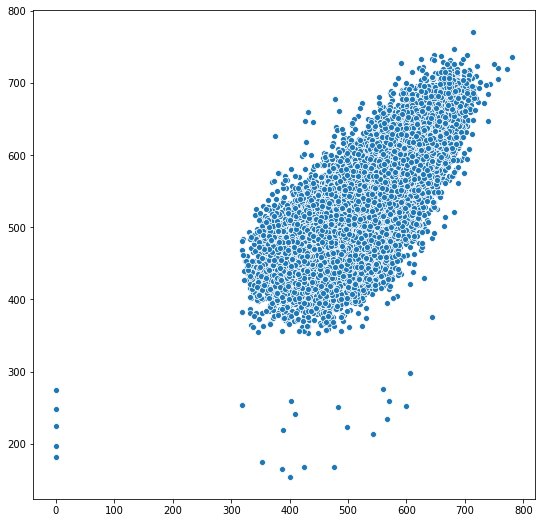

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

Eixo x: Nota real / Eixo y: Nota prevista

É possivel observar que o modelo, conseguiu predizer algumas notas de acordo com a nota verdadeira. No entanto, algumas notas onde a pessoa tirou em media 400 o modelo predizeu uma nota em torno de 100. Então é necessário melhorar o modelo.

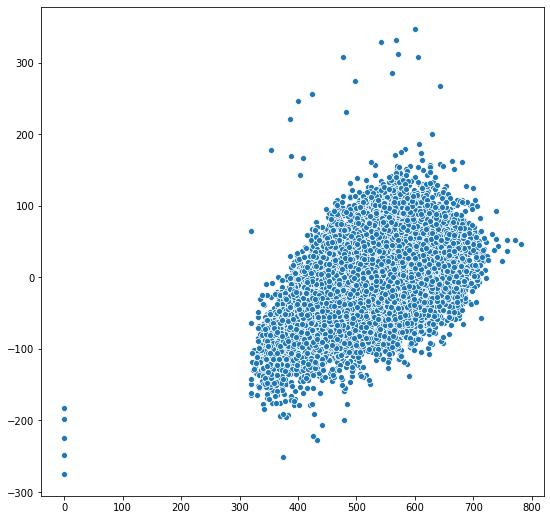

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

Nesse grafico, vamos tentar visualizar a taxa de erro da predição feita pelo modelo. Nota-se que, para pessoas que obtiveram a nota acima de 500, o erro seria positivo, ou seja, preve uma nota superior a nota real. E para pessoas que obtiveram a nota abaixo de 500, o erro seria negativo, ou seja, preve uma nota inferior a nota real.

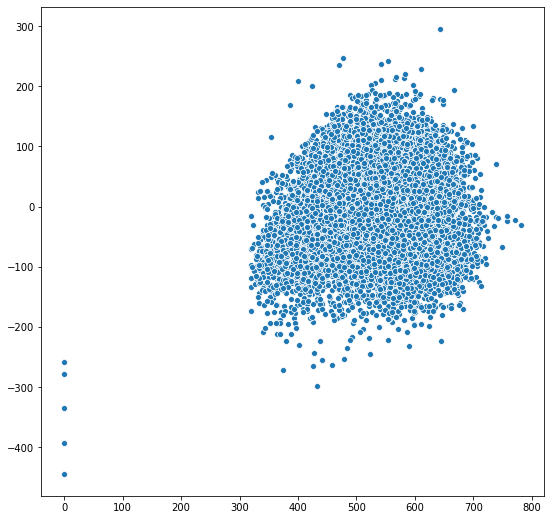

In [0]:
# minha predição TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))

Já esse grafico, é uma tentativa de visualizar a taxa de erro do modelo com a media das notas. É possivel observar a ocorrencia de erros de predição mais grosseiros. 

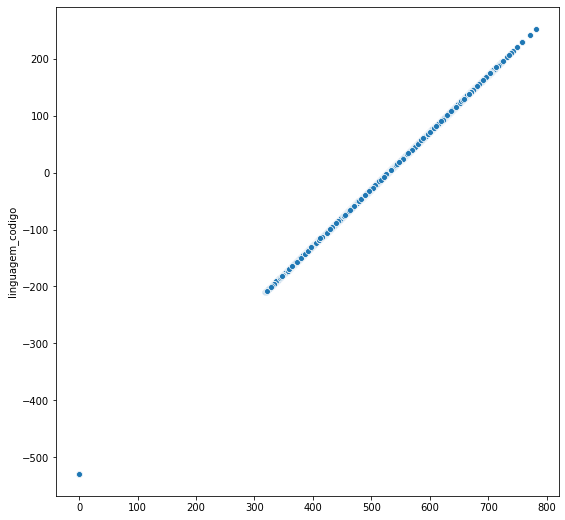

In [0]:
# predição do paulo TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())

Quanto maior a nota da pessoa, mais distante ela está distante da media.Pelo grafico é possivel observar que o modelo errou na mesma proporção em todas as nota prevista.


Criando um modelo baseado em "arvores"

In [0]:
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

Criando gráfico

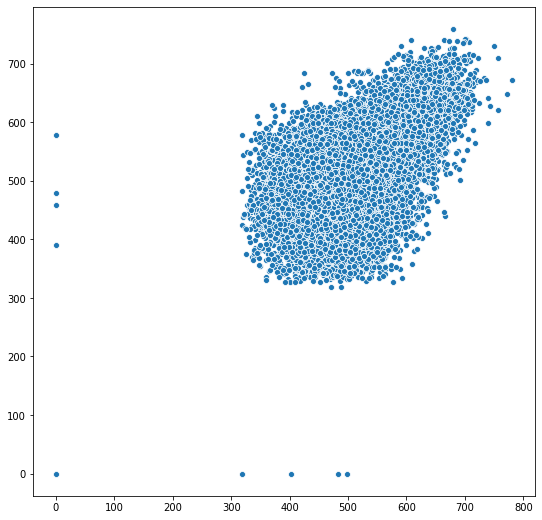

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

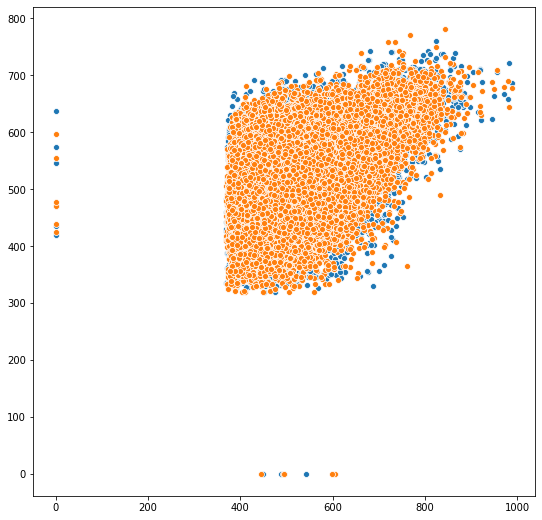

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

Essa figura é muito interessante e mostra uma sobreposição muito boa entre elas, indicando que nossos resultados fazem sentido. Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem, por isso ficaria complexo avaliar dois ou três modelos apenas com gráficos.

O que precisamos agora é de uma métrica capaz de nos dizer como nosso modelo está indo, aqui vamos usar o erro quadrático médio. Existem centenas de métricas de avaliação, tudo vai depender do que você precisa e o que você está prevendo.

In [0]:
mean_squared_error(y_teste, predicoes_notas_linguagem)

4160.601726293281

Veja que nosso erro quadrático médio deu em torno dos 4160. Embora pelo gráfico nosso modelo pareça muito bom, pela métrica parece ser um pouco alto.

O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor. Veja o resultado quando calculamos o MSE de dois vetores iguais:

In [0]:
mean_squared_error(y_teste, y_teste)

0.0

Nosso resultado é zero! Você deve estar se perguntando: meu modelo não está nem perto de zero, será que ele é tão ruim assim?

Nós ainda não temos como te dar essa resposta, precisamos de um critério comparativo, pois assim conseguimos dizer como nosso modelo está indo. Por exemplo, que tal classificar os nossos dados de uma maneira "bobinha"? Para isso temos os chamados métodos Dummy.

In [0]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.479089212121

Finalmente conseguimos responder se nosso modelo é tão ruim assim! Na realidade nosso modelo não é um dos melhores, temos muito o que melhorar, mas já somos melhores que uma classificação ingênua.

## Desafios aula 5

### Desafio 1

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

O parâmetro C é um parâmetro de regularização, onde a força de regularização é inversamente proporcional a ele mesmo. E o parâmetro max_iter determina o número maximo de interações a serem executadas

In [0]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)
modelo = LinearSVR(C = 1, max_iter= 1000)
modelo.fit(x_treino, y_treino)##Treinando o modelo
y_teste.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


527.7587548318148

In [0]:
predicao_notas_linguagens = modelo.predict(x_teste)
predicao_notas_linguagens.mean()

421.8558548687074

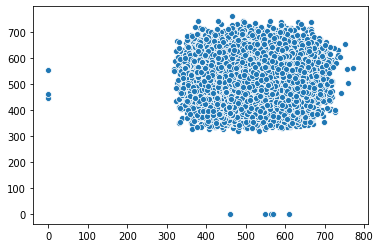

In [0]:
sns.scatterplot(x = y_teste.values, y = predicoes_notas_linguagem)

É possivel observar que ao aumentas os valores destes parametros a precisão do modelo é maior.

### Desafio 2

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

In [0]:
x_teste_mean = (x_teste['matematica'] +x_teste['redacao']  +x_teste['ciencias_naturais']  + x_teste['ciencias_humanas'])/4
x_teste_mean

97749     568.000
93097     579.050
39348     454.600
17935     487.875
74426     494.300
           ...   
119844    494.325
56878     497.200
97722     422.775
98862     633.450
124344    688.850
Length: 24318, dtype: float64

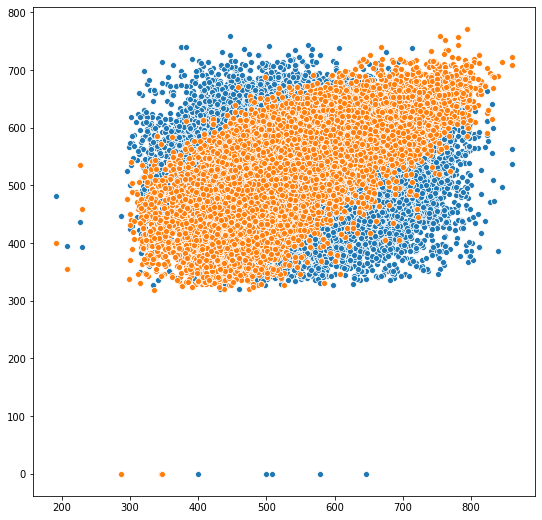

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste_mean.values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste_mean.values, y=y_teste.values)

### Desafio 3

Remover as notas zero e testar os mesmos modelos, comparando o resultado

In [0]:
print(x_4_notas.isnull().values.any(),y_adivinhar.isnull().values.any())

False False


In [0]:
x_4_notas1 = x_4_notas.dropna()
y_adivinhar1 = y_adivinhar.dropna()

In [0]:
mean_squared_error(y_teste, predicoes_notas_linguagem)

10591.082932806976

In [0]:
x_treino1, x_teste1, y_treino1, y_teste1 = train_test_split(x_4_notas1, y_adivinhar1)
modelo = LinearSVR(C = 1, max_iter= 1000)
modelo.fit(x_treino1, y_treino1)
predicoes_notas_linguagem1 = modelo.predict(x_teste1)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
mean_squared_error(y_teste1, predicoes_notas_linguagem1)

2315.7530386419853

### Desafio 4

Interpretar tudo que foi feito e compartilhar suas conclusões

### Desafio 5

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [0]:
modelo2 = LinearSVR(C = 1, max_iter= 1000)
modelo2.fit(x_teste, y_teste)
predicoes_notas_linguagem2 = modelo2.predict(x_treino)

mean_squared_error(y_treino, predicoes_notas_linguagem2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2523.275833510396

Para o calculo, apenas usei a definição do desafio 1. O resultado deu um pouco maior do que no outro caso. Imagino que, pois treinar o modelo com três vezes mais dados, faz ele ser mais acurado(afinal, os dados _treino são três vezes maiores que os _teste). Após rodar algumas vezes, vi que a diferença é extremamente inconsistente, variando bem mais que no outro modelo, em alguns casos foi levemente maior, mas em outros foi muitas vezes maior. Portanto, usar os dados de teste para treinar foi pouco eficaz.